In [1]:
#import some necessary librairies
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns

from scipy import stats
from scipy.stats import norm, skew #for some statistics


In [2]:
#REFERENCES
# https://www.kaggle.com/code/serigne/stacked-regressions-top-4-on-leaderboard
# https://www.kaggle.com/code/juliencs/a-study-on-regression-applied-to-the-ames-dataset

# Read the data
df_train = pd.read_csv('./data/train.csv')
df_test = pd.read_csv('./data/test.csv')

# Remove rows with missing target
df_train.dropna(axis=0, subset=['SalePrice'], inplace=True)

print(f'df_train.shape: {df_train.shape}')
print(f'df_test.shape: {df_test.shape}')

df_train.shape: (1460, 81)
df_test.shape: (1459, 80)


In [3]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
#Save the 'Id' column
train_ID = df_train['Id']
test_ID = df_test['Id']

#Now drop the  'Id' colum since it's unnecessary for  the prediction process.
df_train.drop("Id", axis = 1, inplace = True)
df_test.drop("Id", axis = 1, inplace = True)

#check again the data size after dropping the 'Id' variable
print("\nThe train data size after dropping Id feature is : {} ".format(df_train.shape)) 
print("The test data size after dropping Id feature is : {} ".format(df_test.shape))


The train data size after dropping Id feature is : (1460, 80) 
The test data size after dropping Id feature is : (1459, 79) 


## Research & Remove outliers

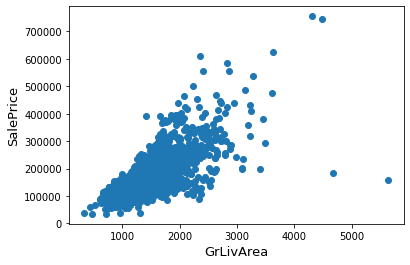

In [6]:
fig, ax = plt.subplots()
ax.scatter(x = df_train['GrLivArea'], y = df_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

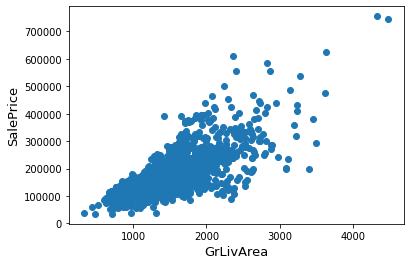

df_train.shape: (1458, 80)
df_test.shape: (1459, 79)


In [7]:
df_train = df_train.drop(df_train[(df_train['GrLivArea']>4000) & (df_train['SalePrice']<300000)].index)

fig, ax = plt.subplots()
ax.scatter(x = df_train['GrLivArea'], y = df_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

print(f'df_train.shape: {df_train.shape}')
print(f'df_test.shape: {df_test.shape}')

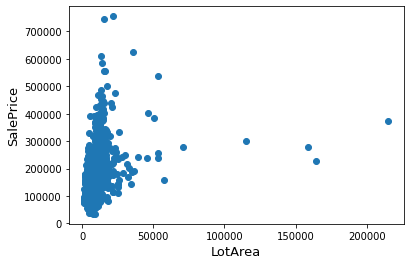

In [8]:
fig, ax = plt.subplots()
ax.scatter(x = df_train['LotArea'], y = df_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('LotArea', fontsize=13)
plt.show()

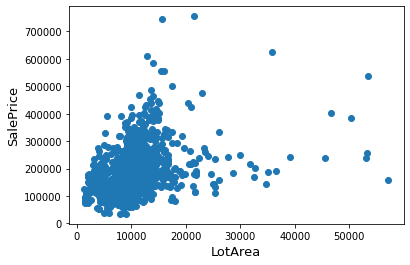

df_train.shape: (1453, 80)
df_test.shape: (1459, 79)


In [9]:
df_train = df_train.drop(df_train[(df_train['LotArea']>60000)].index)

fig, ax = plt.subplots()
ax.scatter(x = df_train['LotArea'], y = df_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('LotArea', fontsize=13)
plt.show()

print(f'df_train.shape: {df_train.shape}')
print(f'df_test.shape: {df_test.shape}')

In [10]:
print(f'df_train.shape: {df_train.shape}')
print(f'df_test.shape: {df_test.shape}')

df_train.shape: (1453, 80)
df_test.shape: (1459, 79)


## Handle missing values

In [11]:
df_train.isnull().sum().sort_values(ascending=False).head(25)

PoolQC          1447
MiscFeature     1401
Alley           1362
Fence           1172
FireplaceQu      690
LotFrontage      256
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtCond          37
BsmtQual          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
MSSubClass         0
Fireplaces         0
Functional         0
KitchenQual        0
KitchenAbvGr       0
BedroomAbvGr       0
dtype: int64

In [12]:
def fillNullValues(df):
    
    df_fill = df.copy()

    #'None' fill
    df_fill['MasVnrType'].fillna('None', inplace=True)

    #'NA' fill
    for col in ('PoolQC', 'MiscFeature', 'Alley', 'FireplaceQu', 'BsmtFinType1', 'BsmtFinType2', 
                'BsmtQual', 'BsmtCond', 'BsmtExposure', 'GarageFinish', 'GarageType', 'GarageQual', 
                'GarageCond', 'Fence', ):
        df_fill[col].fillna('NA', inplace=True)

    #zero fill
    for col in ('GarageYrBlt', 'MasVnrArea', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtFinSF1', 'GarageCars',
               'TotalBsmtSF', 'BsmtUnfSF', 'BsmtFinSF2', 'GarageArea'):
        df_fill[col].fillna(0, inplace=True)

    #fill with most common
    for col in ('MSZoning', 'Electrical', 'Utilities', 'Functional', 'Exterior1st', 'KitchenQual', 
                'SaleType', 'Exterior2nd'):
        df_fill[col].fillna(df_fill[col].value_counts().idxmax(), inplace=True)

    #Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
    df_fill["LotFrontage"] = df_fill.groupby("Neighborhood")["LotFrontage"].transform(
        lambda x: x.fillna(x.median()))
    
    return df_fill




In [13]:
df_train = fillNullValues(df_train)
df_train.isnull().sum().sort_values(ascending=False).head(20)

MSSubClass      0
MSZoning        0
GarageYrBlt     0
GarageType      0
FireplaceQu     0
Fireplaces      0
Functional      0
TotRmsAbvGrd    0
KitchenQual     0
KitchenAbvGr    0
BedroomAbvGr    0
HalfBath        0
FullBath        0
BsmtHalfBath    0
BsmtFullBath    0
GrLivArea       0
LowQualFinSF    0
2ndFlrSF        0
1stFlrSF        0
GarageFinish    0
dtype: int64

In [14]:
df_test = fillNullValues(df_test)
df_test.isnull().sum().sort_values(ascending=False).head(15)

MSSubClass      0
BedroomAbvGr    0
GarageType      0
FireplaceQu     0
Fireplaces      0
Functional      0
TotRmsAbvGrd    0
KitchenQual     0
KitchenAbvGr    0
HalfBath        0
GarageFinish    0
FullBath        0
BsmtHalfBath    0
BsmtFullBath    0
GrLivArea       0
dtype: int64

In [15]:
df_test['BsmtFullBath'].value_counts(dropna=False)

0.0    851
1.0    584
2.0     23
3.0      1
Name: BsmtFullBath, dtype: int64

In [16]:
print(f'df_train.shape: {df_train.shape}')
print(f'df_test.shape: {df_test.shape}')

df_train.shape: (1453, 80)
df_test.shape: (1459, 79)


## Convert categorical data to numeric

### Ordinal categorical (order matters)

In [17]:
from category_encoders import OrdinalEncoder

In [18]:
# ordinal_col_mapping

In [19]:
# print(f'PoolQC: {df_train["PoolQC"].value_counts()}')
# print(f'Utilities: {df_train["Utilities"].value_counts()}')
# print(f'Fence: {df_train["Fence"].value_counts()}')

In [20]:
cat_1 = {'Po': 0, 'NA':0, 'Fa': 1,'TA': 2,'Gd': 3,'Ex': 4}
cat_2 = {'NA': 0,'Po': 1,'Fa': 2,'TA': 3,'Gd': 4,'Ex': 5}
cat_3 = {'NA': 0,'Unf': 1,'LwQ': 2,'BLQ': 3,'Rec': 4,'ALQ': 5,'GLQ': 6}

ordinal_col_mapping = [
    {"col": "Utilities", "mapping": {'ELO': 0,'NoSeWa': 1,'NoSewr': 2,'AllPub': 3}},
    {"col": "ExterQual", "mapping": cat_1},
    {"col": "ExterCond", "mapping": cat_1},
    {"col": "BsmtQual", "mapping": cat_2},
    {"col": "BsmtCond", "mapping": cat_2},
    {"col": "BsmtExposure", "mapping": {'NA': 0,'No': 1,'Mn': 2,'Av': 3,'Gd': 4}},
    {"col": "BsmtFinType1", "mapping": cat_3},
    {"col": "BsmtFinType2", "mapping": cat_3},
    {"col": "HeatingQC", "mapping": cat_1},
    {"col": "CentralAir", "mapping": {'N': 0,'Y': 1}},
    {"col": "Electrical", "mapping": {'Mix': 0,'FuseP': 1,'FuseF': 2,'FuseA': 3,'SBrkr': 4}},
    {"col": "KitchenQual", "mapping": cat_1},
    {"col": "Functional", "mapping": {'Sal': 0,'Sev': 1,'Maj2': 2,'Maj1': 3,'Mod': 4,'Min2': 5,'Min1': 6,'Typ': 7}},
    {"col": "FireplaceQu", "mapping": {'NA': 0,'Po': 1,'Fa': 2,'TA': 3,'Gd': 4,'Ex': 5}},
    {"col": "GarageFinish", "mapping": {'NA': 0,'Unf': 1,'RFn': 2,'Fin': 3}},
    {"col": "GarageQual", "mapping": cat_2},
    {"col": "GarageCond", "mapping": cat_2},
    {"col": "PavedDrive", "mapping": {'N': 0,'P': 1,'Y': 2}},
    {"col": "PoolQC", "mapping": cat_1},
    {"col": "Fence", "mapping": {'NA': 0,'MnWw': 1,'GdWo': 2,'MnPrv': 3,'GdPrv': 4}}
]

def performOrdinalEncoding(df):
    encoder = OrdinalEncoder(mapping = ordinal_col_mapping, return_df=True, handle_missing='error', handle_unknown='error')  
    return encoder.fit_transform(df)

In [21]:
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,NA,NA,NA,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NA,Reg,Lvl,AllPub,FR2,...,0,NA,NA,NA,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NA,IR1,Lvl,AllPub,Inside,...,0,NA,NA,NA,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NA,IR1,Lvl,AllPub,Corner,...,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NA,IR1,Lvl,AllPub,FR2,...,0,NA,NA,NA,0,12,2008,WD,Normal,250000


In [22]:
df_train = performOrdinalEncoding(df_train)
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NA,Reg,Lvl,3,Inside,...,0,0,0,NA,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NA,Reg,Lvl,3,FR2,...,0,0,0,NA,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NA,IR1,Lvl,3,Inside,...,0,0,0,NA,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NA,IR1,Lvl,3,Corner,...,0,0,0,NA,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NA,IR1,Lvl,3,FR2,...,0,0,0,NA,0,12,2008,WD,Normal,250000


In [23]:
df_test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,NA,Reg,Lvl,AllPub,Inside,...,120,0,NA,MnPrv,NA,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,NA,IR1,Lvl,AllPub,Corner,...,0,0,NA,NA,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,NA,IR1,Lvl,AllPub,Inside,...,0,0,NA,MnPrv,NA,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,NA,IR1,Lvl,AllPub,Inside,...,0,0,NA,NA,NA,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,NA,IR1,HLS,AllPub,Inside,...,144,0,NA,NA,NA,0,1,2010,WD,Normal


In [24]:
df_test = performOrdinalEncoding(df_test)
df_test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,NA,Reg,Lvl,3,Inside,...,120,0,0,3,NA,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,NA,IR1,Lvl,3,Corner,...,0,0,0,0,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,NA,IR1,Lvl,3,Inside,...,0,0,0,3,NA,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,NA,IR1,Lvl,3,Inside,...,0,0,0,0,NA,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,NA,IR1,HLS,3,Inside,...,144,0,0,0,NA,0,1,2010,WD,Normal


In [25]:
print(f'df_train.shape: {df_train.shape}')
print(f'df_test.shape: {df_test.shape}')

df_train.shape: (1453, 80)
df_test.shape: (1459, 79)


### One Hot/Nominal categorical (order doesn't matter)

In [26]:
oh_features = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 
               'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 
               'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'GarageType', 'MiscFeature', 'SaleType', 'SaleCondition']


In [27]:
# oh_df = df_train[oh_features].copy()
# oh_df.head()

In [103]:
from sklearn.preprocessing import OneHotEncoder

oh_features = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 
               'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 
               'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'GarageType', 'MiscFeature', 'SaleType', 'SaleCondition']

def performOneHotEncoding(X_train, X_test):
    
    x_tr = X_train.copy()
    x_tr_oh_features_df = x_tr[oh_features].copy()
    x_te = X_test.copy()
    x_te_oh_features_df = x_te[oh_features].copy()
    
    oh_encoder = OneHotEncoder()

    #fit the encoder
    oh_encoder.fit(x_tr_oh_features_df)

    #transform, get an array back
    oh_x_tr_array = oh_encoder.transform(x_tr_oh_features_df)
    oh_x_te_array = oh_encoder.transform(x_te_oh_features_df)

    #get the new feature/column names
    oh_new_feature_names = oh_encoder.get_feature_names_out(oh_features)
    
    #convert oh_array and feature/column names to a new dataframe
    oh_x_tr_df = pd.DataFrame(oh_x_tr_array.todense(), columns=oh_new_feature_names)
    oh_x_te_df = pd.DataFrame(oh_x_te_array.todense(), columns=oh_new_feature_names)

    #drop the 'old' one hot feature columns
    x_tr = x_tr.drop(oh_features, axis=1)
    x_te = x_te.drop(oh_features, axis=1)
    
    #concat the 'new' one hot feature columns
    x_tr = pd.concat([x_tr.reset_index(drop=True), oh_x_tr_df.reset_index(drop=True)], axis=1)
    x_te = pd.concat([x_te.reset_index(drop=True), oh_x_te_df.reset_index(drop=True)], axis=1)

    return x_tr, x_te

In [29]:
print(f'df_train.shape: {df_train.shape}')
print(f'df_test.shape: {df_test.shape}')

df_train.shape: (1453, 80)
df_test.shape: (1459, 79)


In [34]:
df_train_2, df_test_2 = performOneHotEncoding(df_train, df_test)

oh_features: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'GarageType', 'MiscFeature', 'SaleType', 'SaleCondition']


In [38]:
print(f'df_train_2.shape: {df_train_2.shape}')
print(f'df_test_2.shape: {df_test_2.shape}')

df_train_2.shape: (1453, 225)
df_test_2.shape: (1459, 224)


In [36]:
# oh-MSZoning         object
# oh-Street           object
# oh-Alley            object
# oh-LotShape         object
# oh-LandContour      object
# x-Utilities        object
# oh-LotConfig        object
# oh-LandSlope        object
# oh-Neighborhood     object
# oh-Condition1       object
# oh-Condition2       object
# oh-BldgType         object
# oh-HouseStyle       object
# oh-RoofStyle        object
# oh-RoofMatl         object
# oh-Exterior1st      object
# oh-Exterior2nd      object
# oh-VnrType       object
# x-ExterQual        object
# x-ExterCond        object
# oh-Foundation       object
# x-BsmtQual         object
# x-BsmtCond         object
# x-BsmtExposure     object
# x-BsmtFinType1     object
# x-BsmtFinType2     object
# oh-Heating          object
# x-HeatingQC        object
# x-CentralAir       object
# x-Electrical       object
# x-KitchenQual      object
# x-Functional       object
# x-FireplaceQu      object
# oh-GarageType       object
# x-GarageFinish     object
# x-GarageQual       object
# x-GarageCond       object
# x-PavedDrive       object
# x-PoolQC           object
# x-Fence            object
# oh-MiscFeature      object
# oh-SaleType         object
# oh-SaleCondition    object

In [43]:
# have all 'object' types been converted?
numeric_feats = df_train_2.dtypes[df_train_2.dtypes != "object"].index
len(numeric_feats)

225

In [44]:
numeric_feats = df_test_2.dtypes[df_test_2.dtypes != "object"].index
len(numeric_feats)

224

### Now that everything has been converted to numeric, run some preliminary models

In [98]:
from sklearn.model_selection import train_test_split

X = (df_train_2.copy())
y = df_train_2.copy()['SalePrice']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.33, random_state=0)
print(f'X_train.shape: {X_train.shape}')
print(f'X_valid.shape: {X_valid.shape}')
print(f'y_train.shape: {y_train.shape}')
print(f'y_valid.shape: {y_valid.shape}')

X_train.shape: (973, 225)
X_valid.shape: (480, 225)
y_train.shape: (973,)
y_valid.shape: (480,)


In [99]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error

In [100]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
print(f'Train linreg r2:  {linreg.score(X_train, y_train)}')
print(f'Valid linreg r2:  {linreg.score(X_valid, y_valid)}')

Train linreg r2:  1.0
Valid linreg r2:  1.0


In [101]:
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
print(f'Train knn r2:  {knn.score(X_train, y_train)}')
print(f'Valid knn r2:  {knn.score(X_valid, y_valid)}')

Train knn r2:  0.9954796567780839
Valid knn r2:  0.9978914901384776


In [102]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
print(f'Train rf r2:  {rf.score(X_train, y_train)}')
print(f'Valid rf r2:  {rf.score(X_valid, y_valid)}')

Train rf r2:  0.9987541740274176
Valid rf r2:  0.9990431446954021


## Look at skew in our data

In [37]:
abs(df_train.skew(axis=0, numeric_only=True)).sort_values(ascending=False)

Utilities        38.118237
MiscVal          24.486157
PoolQC           18.644078
PoolArea         15.921308
3SsnPorch        10.278995
LowQualFinSF      8.988970
Functional        4.899081
KitchenAbvGr      4.476086
BsmtFinSF2        4.281943
Electrical        4.207392
BsmtHalfBath      4.123997
ScreenPorch       4.110705
GarageYrBlt       3.858497
BsmtCond          3.690846
CentralAir        3.519981
LotArea           3.419981
GarageCond        3.321870
PavedDrive        3.298950
GarageQual        3.218751
BsmtFinType2      3.183977
EnclosedPorch     3.080384
MasVnrArea        2.707760
OpenPorchSF       2.338942
SalePrice         1.900183
Fence             1.799415
LotFrontage       1.543628
WoodDeckSF        1.525263
MSSubClass        1.402960
ExterCond         1.391071
BsmtQual          1.291333
BsmtExposure      1.118810
GrLivArea         1.017545
BsmtUnfSF         0.920885
1stFlrSF          0.896523
ExterQual         0.817776
2ndFlrSF          0.810469
BsmtFinSF1        0.772552
O